# 数值积分方法的能量守恒与时间反演性分析 (Analysis of Energy Conservation and Time Reversibility in Numerical Integration Methods)


在本Notebook中，我们将探讨几种常用的数值积分方法及其在**时间反演性**和**能量守恒**方面的表现。这些方法包括：
- **欧拉法（Euler's Method）**
- **Verlet算法**
- **速度Verlet算法（Velocity Verlet）**
- **Beeman算法**
- **龙格-库塔法（Runge-Kutta Method）**

我们将使用地-日系统的万有引力作为示例，来对比这些方法在不同时间尺度上的能量守恒表现。
This notebook explores several numerical integration methods and their performance in terms of **time reversibility** and **energy conservation**. The methods include:
- **Euler's Method**
- **Verlet Algorithm**
- **Velocity Verlet Algorithm**
- **Beeman Algorithm**
- **Runge-Kutta Method**

A gravitational Earth-Sun system will be used to compare energy conservation of each method over different timescales.



## 数值积分方法（Numerical Integration Methods）
我们将介绍几种常用的数值积分方法及其对应的公式。公式的推导将用LaTeX展示，以帮助更好地理解各方法的原理。


In [6]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 常数和初始条件
G = 4 * np.pi**2  # 引力常数 (AU^3/yr^2)
M_sun = 1.0       # 太阳质量 (单位质量)
dt = 0.01         # 时间步长 (年)
t_max = 20        # 总时间 (年)

# 时间数组
t_values = np.arange(0, t_max, dt)

# 初始条件 (假设地球围绕太阳的圆形轨道)
r0 = np.array([1.0, 0.0])      # 初始位置 (AU)
v0 = np.array([0.0, 2 * np.pi]) # 初始速度 (AU/yr)

# 引力加速度函数
def gravitational_acceleration(r):
    r_mag = np.linalg.norm(r)
    return -G * M_sun * r / r_mag**3


### 欧拉法（Euler's Method）
欧拉法是最简单的数值积分方法之一，其更新公式为：
\begin{align*}
x(t + \Delta t) &= x(t) + v(t) \Delta t \\
v(t + \Delta t) &= v(t) + a(t) \Delta t
\end{align*}
由于误差较大且不具有时间反演性，欧拉法在能量守恒方面表现较差。


In [7]:
# 欧拉法 (Euler's Method)
r_euler = [r0]
v_euler = [v0]
E_euler = []

for t in t_values[:-1]:
    r = r_euler[-1]
    v = v_euler[-1]
    r_new = r + v * dt
    a = gravitational_acceleration(r)
    v_new = v + a * dt
    r_euler.append(r_new)
    v_euler.append(v_new)
    kinetic = 0.5 * np.dot(v, v)
    potential = -G * M_sun / np.linalg.norm(r)
    E_euler.append(kinetic + potential)


### Verlet算法（Verlet Algorithm）
Verlet算法利用位置和加速度来更新位置，不直接计算速度，其公式为：
\begin{align*}
x(t + \Delta t) = 2x(t) - x(t - \Delta t) + a(t) (\Delta t)^2
\end{align*}
速度可以通过位置差分近似得到，Verlet算法具有时间反演性和较好的能量守恒性。


In [8]:
# Verlet法 (Verlet Method)
r_verlet = [r0]
v_verlet = [v0]
a = gravitational_acceleration(r0)
r_prev = r0 - v0 * dt
E_verlet = []

for t in t_values[:-1]:
    r = r_verlet[-1]
    r_new = 2 * r - r_prev + a * dt**2
    a_new = gravitational_acceleration(r_new)
    v = (r_new - r_prev) / (2 * dt)
    v_verlet.append(v)
    r_prev = r
    r_verlet.append(r_new)
    a = a_new
    kinetic = 0.5 * np.dot(v, v)
    potential = -G * M_sun / np.linalg.norm(r)
    E_verlet.append(kinetic + potential)


### 速度Verlet算法（Velocity Verlet Algorithm）
速度Verlet算法在更新位置的同时也更新速度，其公式为：
\begin{align*}
x(t + \Delta t) &= x(t) + v(t) \Delta t + \frac{1}{2} a(t) (\Delta t)^2 \\
v(t + \Delta t) &= v(t) + \frac{1}{2} \left( a(t) + a(t + \Delta t) \right) \Delta t
\end{align*}
该算法也具备时间反演性，并能够更精确地计算速度。


In [9]:
# 速度Verlet法 (Velocity Verlet Method)
r_vverlet = [r0]
v_vverlet = [v0]
E_vverlet = []

for t in t_values[:-1]:
    r = r_vverlet[-1]
    v = v_vverlet[-1]
    a = gravitational_acceleration(r)
    r_new = r + v * dt + 0.5 * a * dt**2
    a_new = gravitational_acceleration(r_new)
    v_new = v + 0.5 * (a + a_new) * dt
    r_vverlet.append(r_new)
    v_vverlet.append(v_new)
    kinetic = 0.5 * np.dot(v, v)
    potential = -G * M_sun / np.linalg.norm(r)
    E_vverlet.append(kinetic + potential)


### Beeman算法（Beeman Algorithm）
Beeman算法在分子动力学中常用于计算精确的速度，其公式为：
\begin{align*}
x(t + \Delta t) &= x(t) + v(t) \Delta t + \frac{1}{6} \left( 4a(t) - a(t - \Delta t) \right) (\Delta t)^2 \\
v(t + \Delta t) &= v(t) + \frac{1}{6} \left( 2a(t + \Delta t) + 5a(t) - a(t - \Delta t) \right) \Delta t
\end{align*}
该方法能提高短期内的精度，但不是时间可逆的。


In [10]:
# Beeman法 (Beeman Method)
r_beeman = [r0]
v_beeman = [v0]
a = gravitational_acceleration(r0)
a_prev = a
E_beeman = []

for t in t_values[:-1]:
    r = r_beeman[-1]
    v = v_beeman[-1]
    r_new = r + v * dt + (4 * a - a_prev) * dt**2 / 6
    a_new = gravitational_acceleration(r_new)
    v_new = v + (2 * a_new + 5 * a - a_prev) * dt / 6
    r_beeman.append(r_new)
    v_beeman.append(v_new)
    a_prev = a
    a = a_new
    kinetic = 0.5 * np.dot(v, v)
    potential = -G * M_sun / np.linalg.norm(r)
    E_beeman.append(kinetic + potential)


### 龙格-库塔法（Runge-Kutta Method）
四阶龙格-库塔法（RK4）是常用的高精度方法，更新公式为：
\begin{align*}
k_1 &= f(t, y) \\
k_2 &= f\left(t + \frac{\Delta t}{2}, y + \frac{\Delta t}{2} k_1\right) \\
k_3 &= f\left(t + \frac{\Delta t}{2}, y + \frac{\Delta t}{2} k_2\right) \\
k_4 &= f(t + \Delta t, y + \Delta t \cdot k_3) \\
y(t + \Delta t) &= y(t) + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
虽然精度高，但不具备时间反演性，长时间内能量可能漂移。


In [11]:
# 四阶Runge-Kutta法 (Runge-Kutta Method)
r_rk = [r0]
v_rk = [v0]
E_rk = []

for t in t_values[:-1]:
    r = r_rk[-1]
    v = v_rk[-1]
    a = gravitational_acceleration(r)
    
    k1_v = a * dt
    k1_r = v * dt
    k2_v = gravitational_acceleration(r + 0.5 * k1_r) * dt
    k2_r = (v + 0.5 * k1_v) * dt
    k3_v = gravitational_acceleration(r + 0.5 * k2_r) * dt
    k3_r = (v + 0.5 * k2_v) * dt
    k4_v = gravitational_acceleration(r + k3_r) * dt
    k4_r = (v + k3_v) * dt
    
    v_new = v + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
    r_new = r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    
    r_rk.append(r_new)
    v_rk.append(v_new)
    
    kinetic = 0.5 * np.dot(v, v)
    potential = -G * M_sun / np.linalg.norm(r)
    E_rk.append(kinetic + potential)

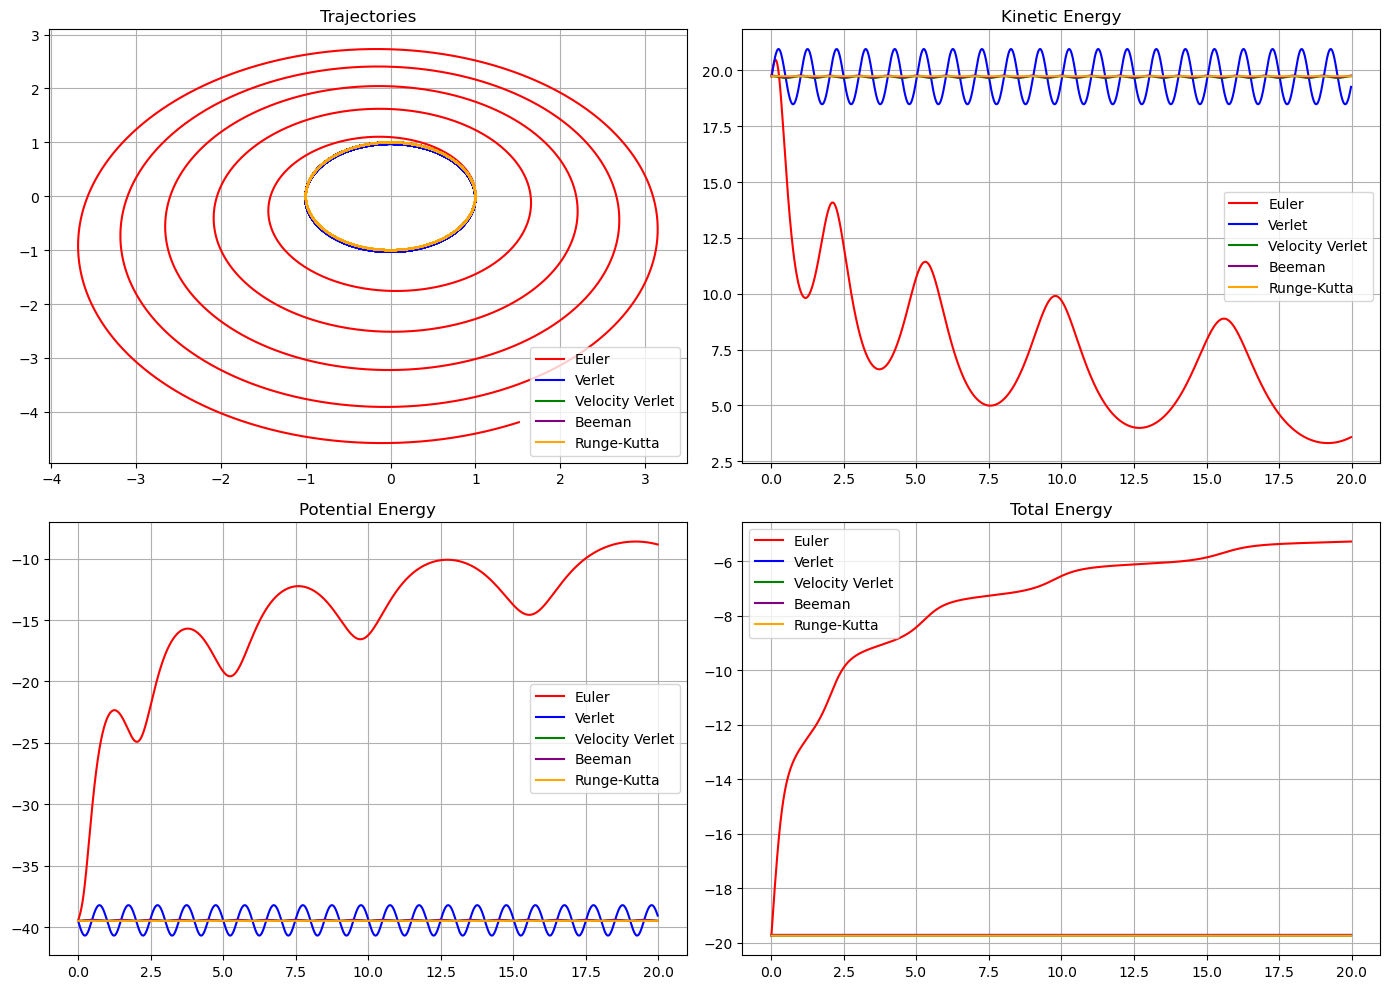

In [14]:
# 确保时间数组和能量列表的长度相同
time_for_plot = t_values[:len(E_euler)]  # 确保与E_x等能量列表长度匹配

# 绘制轨迹和能量
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 轨迹
axs[0, 0].plot([r[0] for r in r_euler], [r[1] for r in r_euler], label="Euler", color='r')
axs[0, 0].plot([r[0] for r in r_verlet], [r[1] for r in r_verlet], label="Verlet", color='b')
axs[0, 0].plot([r[0] for r in r_vverlet], [r[1] for r in r_vverlet], label="Velocity Verlet", color='g')
axs[0, 0].plot([r[0] for r in r_beeman], [r[1] for r in r_beeman], label="Beeman", color='purple')
axs[0, 0].plot([r[0] for r in r_rk], [r[1] for r in r_rk], label="Runge-Kutta", color='orange')
axs[0, 0].set_title('Trajectories')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 动能
axs[0, 1].plot(time_for_plot, [0.5 * np.dot(v, v) for v in v_euler[:len(time_for_plot)]], label="Euler", color='r')
axs[0, 1].plot(time_for_plot, [0.5 * np.dot(v, v) for v in v_verlet[:len(time_for_plot)]], label="Verlet", color='b')
axs[0, 1].plot(time_for_plot, [0.5 * np.dot(v, v) for v in v_vverlet[:len(time_for_plot)]], label="Velocity Verlet", color='g')
axs[0, 1].plot(time_for_plot, [0.5 * np.dot(v, v) for v in v_beeman[:len(time_for_plot)]], label="Beeman", color='purple')
axs[0, 1].plot(time_for_plot, [0.5 * np.dot(v, v) for v in v_rk[:len(time_for_plot)]], label="Runge-Kutta", color='orange')
axs[0, 1].set_title('Kinetic Energy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 势能
axs[1, 0].plot(time_for_plot, [-G * M_sun / np.linalg.norm(r) for r in r_euler[:len(time_for_plot)]], label="Euler", color='r')
axs[1, 0].plot(time_for_plot, [-G * M_sun / np.linalg.norm(r) for r in r_verlet[:len(time_for_plot)]], label="Verlet", color='b')
axs[1, 0].plot(time_for_plot, [-G * M_sun / np.linalg.norm(r) for r in r_vverlet[:len(time_for_plot)]], label="Velocity Verlet", color='g')
axs[1, 0].plot(time_for_plot, [-G * M_sun / np.linalg.norm(r) for r in r_beeman[:len(time_for_plot)]], label="Beeman", color='purple')
axs[1, 0].plot(time_for_plot, [-G * M_sun / np.linalg.norm(r) for r in r_rk[:len(time_for_plot)]], label="Runge-Kutta", color='orange')
axs[1, 0].set_title('Potential Energy')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 总能量
axs[1, 1].plot(time_for_plot, E_euler, label="Euler", color='r')
axs[1, 1].plot(time_for_plot, E_verlet, label="Verlet", color='b')
axs[1, 1].plot(time_for_plot, E_vverlet, label="Velocity Verlet", color='g')
axs[1, 1].plot(time_for_plot, E_beeman, label="Beeman", color='purple')
axs[1, 1].plot(time_for_plot, E_rk, label="Runge-Kutta", color='orange')
axs[1, 1].set_title('Total Energy')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
